In [3]:
import numpy as np
# This script generates the input files calculating linear abs for NISE
# It will also run the NISE calculations provided that the correct path to
# NISE program is ndicated.

# Input:
# - Site energies (text)
# - Protein structure
# Output:
# - energy trajectories
# - dipole trajectories
# - NISE input files (translation, Absorption, 2DES, ...)

#  Files
f_pdb = '1rwt.pdb' # Structure pdb
f_site = 'Site.txt' # Site energies
f_ham = 'Energy' # Hamiltonian input for NISE
f_dp = 'Dipole' # Dipole input for NISE
f_pos = 'Position' # Position input for NISE
f_i1D = 'input1D' # NISE absorption calculation parameters
f_iTra = 'inpTra' # NISE translate parameters
f_i2D = 'input2D' # NISE 2D calculation parameters
f_iCG2D = 'inputCG2D' # NISE coarse grained 2D calculation
f_iDif = 'inputDif' # NISE Diffusion
f_iPop = 'inputPop' # NISE population transfer
f_iAnalyse = 'inputAnalyse' # NISE Analyze
f_iLum = 'inputLum' # NISE Luminescence
f_iCD = 'inputCD' # NISE circular dichroism
f_iLD = 'inputLD' # NISE linear dichroism
f_iDOS = 'inputDOS' # NISE density of states

# Parameter
E0 = np.genfromtxt('Site.txt') # Site energies [cm-1]
E0 = E0.astype('int16')
sigma = np.array([150, 6000]) # Disorders (static & dynamic) [cm-1]
tauc = np.array([100, 1000000]) # Correlation time [fs]
dt = 1 # Time step [fs]
N = E0.size # Number of chromophores (singles)
Nstep = 10001 # Number of time steps
taudeph = 100 # Dephasing time [fs]
t1 = np.array(range(0,Nstep,dt)) # Time array [fs]
Tw = 0 # Waiting time for 2DES [fs]
T = 300 # Temperature [K]

### NISE input parameters
# For translation between bin and txt
niseTra = {
    'InputEnergy': f_ham + '.bin',
    'InputDipole': f_dp + '.bin',
    'OutputEnergy': f_ham + '.txt',
    'OutputDipole': f_dp + '.txt',
    'Singles': N,
    'Doubles': 0,
    'Skip': 'Doubles',
    'Length': Nstep,
    'InputFormat': 'GROBIN',
    'OutputFormat': 'GROASC'
}

# For 1D (absorption) calculation
nise1D = {
    'Propagation': 'Coupling',
    'Couplingcut': 0,
    'Threshold': 0.001,
    'Hamiltonianfile': f_ham + '.bin',
    'Dipolefile': f_dp + '.bin',
    'Length': Nstep,
    'Samplerate': 20,
    'Lifetime': taudeph,
    'Timestep': dt,
    'Trotter': 1,
    'Anharmonicity': 100,
    'Format': 'Dislin',
    'MinFrequencies': [14000, 14000, 14000],
    'MaxFrequencies': [16500, 16500, 16500],
    'Technique': 'Absorption',
    'FFT': 2048,
    'RunTimes': [round(1.5*taudeph/dt), 0, round(1.5*taudeph/dt)],
    'Singles': N
}

### Generate energy trajectories
# Generating the trajectories of E0 based on overdamped brownian oscillator model
# The amplitude is sigma, corrleation time is tauc
dE = np.zeros((N,Nstep))
E = np.copy(dE)
dE[:,0] = np.sum(sigma*np.random.randn(N,len(sigma)),axis=1)
E[:,0] = E0 + dE[:,0]
for nt in range(1,Nstep):
    dE[:,nt] = dE[:,nt-1]*np.prod(np.exp(-1/tauc*(t1[nt]-t1[nt-1]))) + np.sum(sigma*np.random.randn(N,len(sigma))*np.sqrt(1-np.exp(-2/tauc*(t1[nt]-t1[nt-1]))),axis=1)
    E[:,nt] = E0 + dE[:,nt]


            


### Write to files

In [165]:
from Bio.PDB import *

# Read coordinates from pdb file
p = PDBParser()
s = p.get_structure("1rwt", "1rwt.pdb")
# Choose chains, residues and atom types                    
pick_chain = "CEH"
pick_residue = ["CHL","CLA"]
pick_atom = ["MG","NA","NB","NC","ND"]
# get coordinates for MG, NA, NB, NC, ND
mg = np.empty
na = np.empty
nb = np.empty
nc = np.empty
nd = np.empty
aatom = Entity.Entity
for chains in s:
    for chain in chains:
        if chain.id in pick_chain:
            for residue in chain:
                if residue.resname in pick_residue:    
                    aatom.add(aatom,residue)                  
                    # for atom in residue:
                        # if atom.id in pick_atom:
                        # aatom = atom.copy
                        # print(aatom)
#                         if atom.id=="MG":
#                             mg = np.append(mg,np.array(atom.coord))
#                         if atom.id=="NA":
#                             na = np.append(na,np.array(atom.coord))                        
#                         if atom.id=="NB":
#                             nb = np.append(nb,np.array(atom.coord))
#                         if atom.id=="NC":
#                             nc = np.append(nc,np.array(atom.coord))
#                         if atom.id=="ND":
#                             nd = np.append(nd,np.array(atom.coord))
# N = int(np.size(mg[1:])/3)
# mg = np.resize(mg[1:], (N,3)) 
# na = np.resize(na[1:], (N,3)) 
# nb = np.resize(nb[1:], (N,3)) 
# nc = np.resize(nc[1:], (N,3)) 
# nd = np.resize(nd[1:], (N,3))



/home/long/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19361.
  warnings.warn(
/home/long/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20534.
  warnings.warn(
/home/long/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21816.
  warnings.warn(
/home/long/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 22922.
  warnings.warn(
/home/long/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 24160.
  warnings.warn(
/home/long/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 25332.
  w

NameError: name 'm' is not defined

In [166]:
print(aatom.__len__)

<function Entity.__len__ at 0x7fbac71bc550>


(14, 10001)

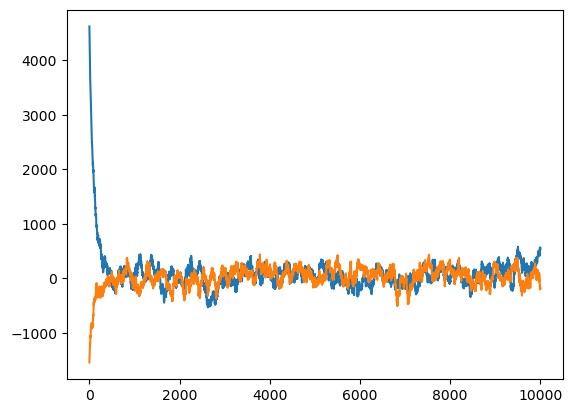

In [166]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(t1,dE[0,:])
ax.plot(t1,dE[1,:])
dE.shape


In [160]:
len(t1)

10001